In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
imdb=pd.read_csv('/content/imdb_data.csv')

In [ ]:
imdb.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


In [ ]:
#lets check for the misssing values

In [ ]:
imdb.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,51


In [ ]:
# lets replace the missing values of gross with KNN imputation

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
imdb[['budget','gross']]= imputer.fit_transform(imdb[['budget','gross']])

In [ ]:
imdb.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,0


In [ ]:
#drop release date

In [ ]:
imdb.columns

Index(['id', 'primaryTitle', 'originalTitle', 'isAdult', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'budget', 'gross',
       'release_date', 'directors'],
      dtype='object')

In [ ]:
imdb=imdb.dropna(subset=['release_date'])

In [ ]:
imdb.shape

(3343, 12)

In [ ]:
#lets find out  How many unique movies are in the dataset?

In [ ]:
imdb.columns

Index(['id', 'primaryTitle', 'originalTitle', 'isAdult', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'budget', 'gross',
       'release_date', 'directors'],
      dtype='object')

In [ ]:
imdb['id'].nunique()

3343

In [ ]:
#lets check the overall distribution of movie runtime.

<ipython-input-34-7fa4a5d97fb9>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=imdb,x='runtimeMinutes',bins=60,kde=True,palette='Set2')


Text(0, 0.5, 'count of movies')

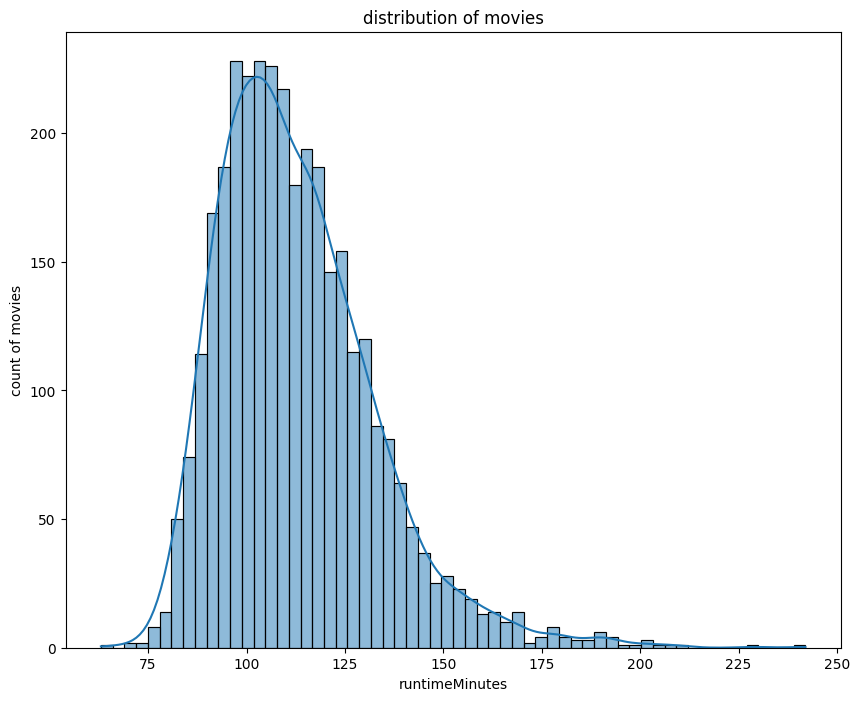

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=imdb,x='runtimeMinutes',bins=60,kde=True,palette='Set2')
plt.title('distribution of movies')
plt.xlabel('runtimeMinutes')
plt.ylabel('count of movies')

Text(0.5, 0, 'runtimeMinutes')

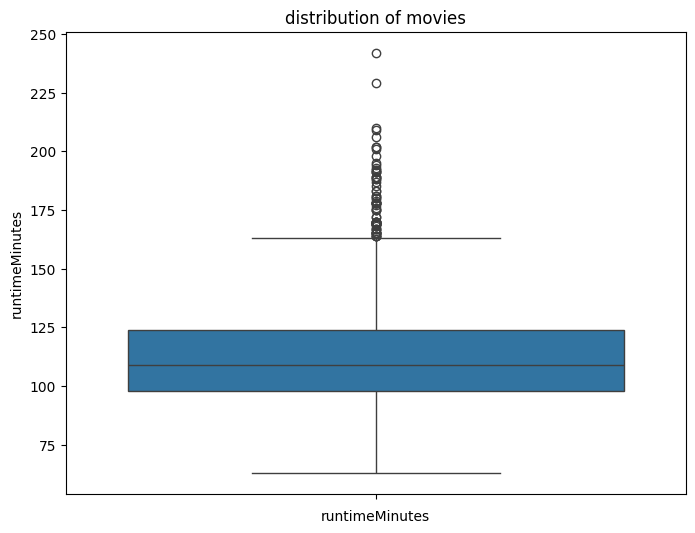

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(imdb['runtimeMinutes'])
plt.title('distribution of movies')
plt.xlabel('runtimeMinutes')


In [ ]:
#lets check How many movies are marked as "Adult" (isAdult=1) vs. non-adult (isAdult=0)?

In [ ]:
imdb['isAdult'].unique()

array([0])

-as weseen we have only one category in adult section.

-that mean all movies is only for Adult

-so for better analysis we drop the adult column

In [ ]:
#lets check How many movies are marked as "Adult" (isAdult=1) vs. non-adult (isAdult=0)?

In [ ]:
imdb['isAdult'].unique()

array([0])

-as weseen we have only one category in adult section.

-that mean all movies is only for Adult

-so for better analysis we drop the adult column

In [ ]:
imdb.drop(columns=['isAdult'],inplace=True)

In [ ]:
#What are the top 10 most common movie genres?

In [ ]:
imdb.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold


In [ ]:
genres_list=imdb['genres'].str.split(',').explode()

In [ ]:

genres_list

,genres
0,Comedy
0,Fantasy
0,Romance
1,Adventure
1,Animation
...,...
3346,Adventure
3346,Horror
3347,Comedy
3347,Crime


In [ ]:
genres_count = genres_list.value_counts().head(10)

In [ ]:
genres_count

,count
genres,
Drama,1542
Comedy,1176
Action,1171
Adventure,894
Crime,652
Thriller,632
Romance,441
Horror,402
Mystery,376


<ipython-input-71-754781e4b732>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_count.index,y=genres_count.values,palette='Set1')


<Axes: xlabel='genres'>

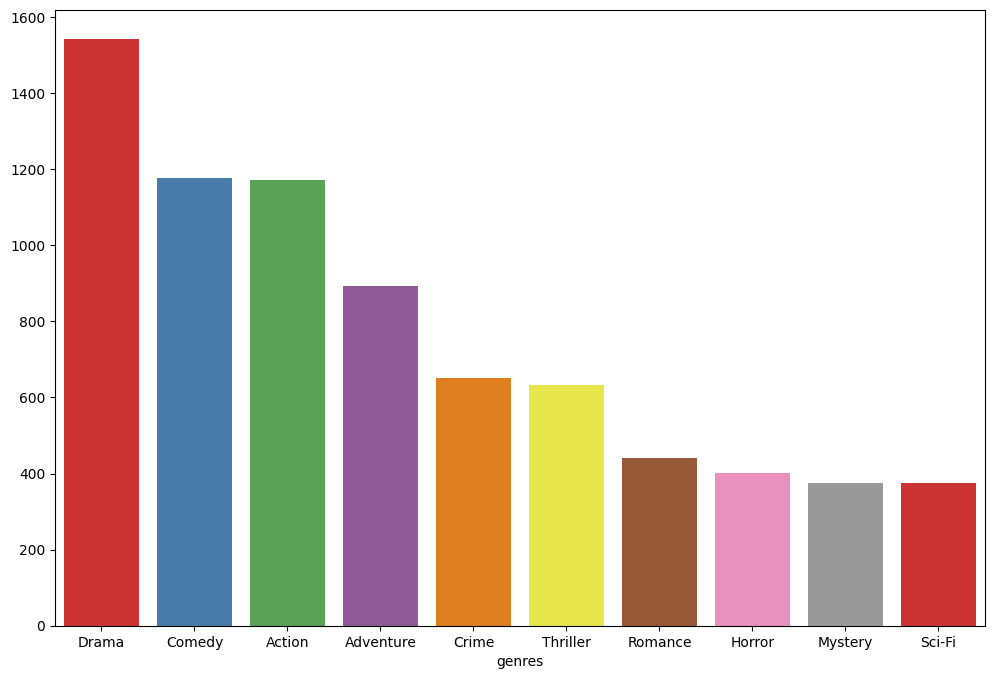

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=genres_count.index,y=genres_count.values,palette='Set1')